In [1]:
%load_ext autoreload
%autoreload 2 # what is this for exactly?

In [2]:
%matplotlib widget

In [3]:
import matplotlib.pyplot as plt
from pathlib import Path
import numpy as np

import spikeinterface.full as si

In [16]:
oe_folder = Path('/data2/Anindita/Openephys/b13g13/08122022')

In [5]:
rec = si.read_openephys(oe_folder)
rec


OpenEphysBinaryRecordingExtractor: 66 channels - 1 segments - 30.0kHz - 7619.770s

In [26]:
from probeinterface import get_probe
probe = get_probe('cambridgeneurotech', 'ASSY-236-H5')
probe.wiring_to_device('cambridgeneurotech_mini-amp-64')
probe


cambridgeneurotech - ASSY-236-H5 - 64ch - 1shanks

In [30]:
to_share = probe.to_dataframe(complete=True)
to_share.to_csv('toshare.csv')

In [9]:
rec_with_probe = rec.set_probe(probe)

rec_with_probe


ChannelSliceRecording: 64 channels - 1 segments - 30.0kHz - 7619.770s

In [29]:
info_to_share = rec_with_probe.get_probe().to_dataframe(complete=True)
info_to_share.to_csv('test.csv')

/home/eduarda/.virtualenvs/py310_si/lib/python3.10/site-packages/ipywidgets/widgets/widget.py:443: DeprecationWarning: Passing unrecognized arguments to super(Toolbar).__init__().
NavigationToolbar2WebAgg.__init__() missing 1 required positional argument: 'canvas'
This is deprecated in traitlets 4.2.This error will be raised in a future release of traitlets.
  super().__init__(**kwargs)


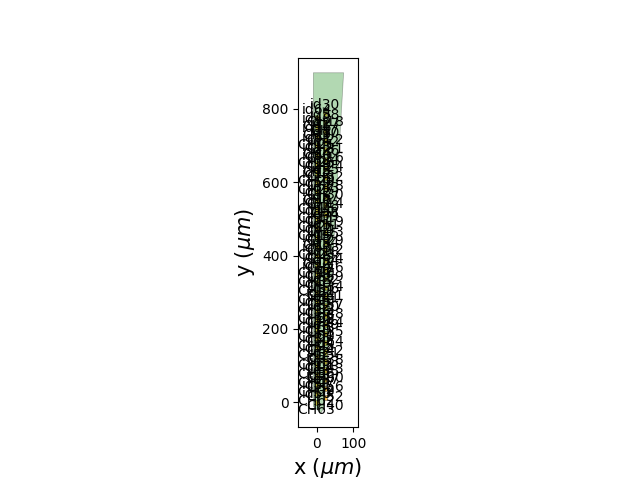

In [11]:
si.plot_probe_map(rec_with_probe, with_channel_ids=True, with_contact_id=True)

In [19]:
rec = si.read_openephys(
        oe_folder
    )
# print(rec)

# Add probe here
probe = get_probe('cambridgeneurotech', 'ASSY-236-H5')
probe.wiring_to_device('cambridgeneurotech_mini-amp-64')
rec = rec.set_probe(probe, group_mode='by_shank')
print(rec.get_property('group'))

fs = rec.get_sampling_frequency()

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


In [25]:
session_name = oe_folder.stem
bird_name = oe_folder.parents[0].stem
print(session_name, bird_name)

08122022 b13g13
